### [ QQ Plot - 정규성/왜도/첨도 체크 ]

사용할 폰트 이름: Malgun Gothic


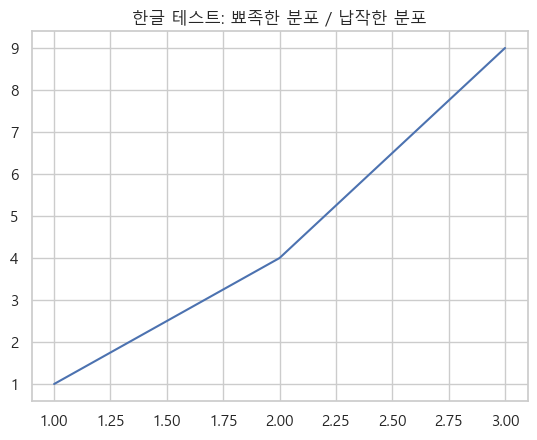

In [7]:
## 모듈 로딩
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from scipy import stats

# === 여기 추가 (한글 폰트 설정) =======================
font_path =r'C:\Windows\Fonts\malgun.ttf'

font_prop = font_manager.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print("사용할 폰트 이름:", font_name)

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글용
plt.rcParams['font.sans-serif'] = ['Malgun Gothic', 'DejaVu Sans']  # 폴백 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# seaborn 테마에도 폰트 적용 (여기가 중요!)
sns.set_theme(style="whitegrid",
              font=font_name,
              rc={"axes.unicode_minus": False})

# =====================================================

# 여기서 간단 테스트
plt.figure()
plt.title("한글 테스트: 뾰족한 분포 / 납작한 분포")
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()

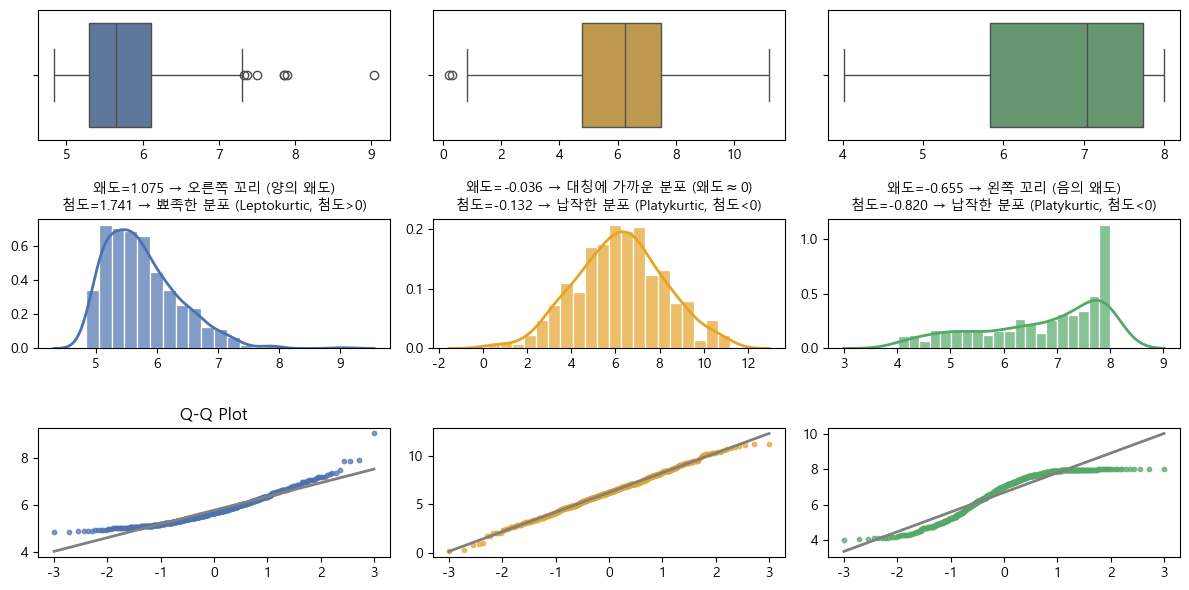

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager

# ================================
# 1. 한글 폰트 설정 (Windows 기준)
# ================================
font_path = "C:/Windows/Fonts/malgun.ttf"  # 환경에 맞게 수정
font_prop = font_manager.FontProperties(fname=font_path)
font_name = font_prop.get_name()

plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# sns.set_theme(
#     style="whitegrid",
#     font=font_name,
#     rc={"axes.unicode_minus": False},
# )

plt.rcParams['font.sans-serif'] = ['Malgun Gothic', 'DejaVu Sans']  # 폴백 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ================================
# 2. 예제 데이터 생성
#    data1 : 오른쪽 꼬리 + 뾰족 (첨도 > 0, leptokurtic)
#    data2 : 정규분포 (기준)
#    data3 : 왼쪽 꼬리 + 납작 (첨도 < 0, platykurtic)
# ================================
np.random.seed(42)
n = 500

# 왼쪽 그래프: 오른쪽 꼬리 + 뾰족 (skew > 0, kurt > 0)
data1 = stats.skewnorm(a=8, loc=5.0, scale=1.0).rvs(n)

# 가운데 그래프: 정규분포
data2 = stats.norm(loc=6.0, scale=2.0).rvs(n)

# 오른쪽 그래프: 왼쪽 꼬리 + 납작 (skew < 0, kurt < 0)
U = np.random.uniform(0, 1, n)
data3 = 8 - (U**2) * 4    # 왼쪽으로 약간 쏠리고, 납작한 분포

datasets = [data1, data2, data3]
colors   = ["#4C72B0", "#E5A329", "#55A868"]

# ================================
# 3. 플롯
# ================================
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

for i, (data, color) in enumerate(zip(datasets, colors)):
    # ---- 왜도 & 첨도 계산 ----
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data, fisher=True)   # 정규분포면 0 (Fisher 방식)

    # ---- 왜도 해석 (왼쪽/오른쪽 꼬리) ----
    if skew_val > 0.1:
        skew_type = "오른쪽 꼬리 (양의 왜도)"
    elif skew_val < -0.1:
        skew_type = "왼쪽 꼬리 (음의 왜도)"
    else:
        skew_type = r"대칭에 가까운 분포 (왜도$\approx$0)"

    # ---- 첨도 해석 (뾰족/정규/납작) ----
    #  >0  → 정규보다 뾰족 (Leptokurtic)
    #  =0  → 정규와 비슷  (Mesokurtic)
    #  <0  → 정규보다 납작 (Platykurtic)
    if kurt_val > 0:
        kurt_type = "뾰족한 분포 (Leptokurtic, 첨도>0)"
    elif kurt_val < 0:
        kurt_type = "납작한 분포 (Platykurtic, 첨도<0)"
    else:
        kurt_type = r"정규에 가까운 첨도 (Mesokurtic, 첨도$\approx$0)"

    # ==========================
    # 1행: Boxplot
    # ==========================
    ax_box = axes[0, i]
    sns.boxplot(x=data, ax=ax_box, color=color, saturation=0.6)
    ax_box.set_xlabel("")
    ax_box.set_ylabel("")

    # ==========================
    # 2행: 분포 (히스토그램 + KDE)
    # ==========================
    ax_dist = axes[1, i]
    sns.histplot(
        data,
        stat="density",
        bins=20,
        ax=ax_dist,
        color=color,
        edgecolor="white",
        alpha=0.7,
    )
    sns.kdeplot(data, ax=ax_dist, color=color, linewidth=2)

    title_text = (
        f"왜도={skew_val:.3f} → {skew_type}\n"
        f"첨도={kurt_val:.3f} → {kurt_type}"
    )
    ax_dist.set_title(title_text, fontsize=10)

    ax_dist.set_xlabel("")
    ax_dist.set_ylabel("")

    # ==========================
    # 3행: Q-Q Plot
    # ==========================
    ax_qq = axes[2, i]

    (osm, osr), (slope, intercept, r) = stats.probplot(
        data, dist="norm", plot=None
    )

    ax_qq.scatter(osm, osr, color=color, s=10, alpha=0.7)

    x_line = np.array([osm.min(), osm.max()])
    y_line = slope * x_line + intercept
    ax_qq.plot(x_line, y_line, color="gray", linewidth=2)

    if i == 0:
        ax_qq.set_title("Q-Q Plot")

    ax_qq.set_xlabel("")
    ax_qq.set_ylabel("")

plt.tight_layout()
plt.show()
